In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('titanic.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
import chardet

In [6]:
with open("titanic.csv",'rb') as rawdata:
    result = chardet.detect(rawdata.read(100))
    
print(result)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [7]:
df = pd.read_csv("titanic.csv", encoding = "ascii")
df.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
!pip install sweetviz

In [9]:
import sweetviz as sv
report = sv.analyze(df)
report.show_html("titanic.html")


Report titanic.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Missing Values

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
df.isnull().sum()/len(df.index)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Gender         0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

Drop Cabin column. ALso drop Passenger_id, Ticket

In [12]:
df.drop(['Cabin','PassengerId','Name','Ticket'],axis = 1, inplace=True)

In [13]:
df.head()

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [14]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [15]:
df['Embarked'].mode()

0    S
dtype: object

In [16]:
df['Embarked'].mode()[0]

'S'

In [20]:
df['Embarked'].fillna(str(df['Embarked'].mode()[0]),inplace= True)

In [21]:
df.isnull().sum()

Survived      0
Pclass        0
Gender        0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [24]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [26]:
df_groupby = df.groupby(['Gender','Pclass'])

In [27]:
df_groupby['Age'].median()

Gender  Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [28]:
df.tail(10)

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
881,0,3,male,33.0,0,0,7.8958,S
882,0,3,female,22.0,0,0,10.5167,S
883,0,2,male,28.0,0,0,10.5000,S
884,0,3,male,25.0,0,0,7.0500,S
885,0,3,female,39.0,0,5,29.1250,Q
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C
890,0,3,male,32.0,0,0,7.7500,Q


In [29]:
def impute_median(series):
    return series.fillna(series.median())

In [30]:
df['Age'] = df_groupby['Age'].apply(impute_median)

In [31]:
df.tail(10)

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
881,0,3,male,33.0,0,0,7.8958,S
882,0,3,female,22.0,0,0,10.5167,S
883,0,2,male,28.0,0,0,10.5000,S
884,0,3,male,25.0,0,0,7.0500,S
885,0,3,female,39.0,0,5,29.1250,Q
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,21.5,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C
890,0,3,male,32.0,0,0,7.7500,Q


In [32]:
df.isnull().sum()

Survived    0
Pclass      0
Gender      0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# Derived Metrics

In [39]:
#Person Type

def persontype_func(list1):
    age, gender = list1
    if age < 16:
        return('Child')
    else:
        if gender == 'female':
            return('Woman')
        else:
            return('Man')

In [40]:
df['persontype'] = df[['Age','Gender']].apply(persontype_func,axis=1)

In [41]:
df.head(10)

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked,persontype
0,0,3,male,22.0,1,0,7.2500,S,Man
1,1,1,female,38.0,1,0,71.2833,C,Woman
2,1,3,female,26.0,0,0,7.9250,S,Woman
3,1,1,female,35.0,1,0,53.1000,S,Woman
4,0,3,male,35.0,0,0,8.0500,S,Man
5,0,3,male,25.0,0,0,8.4583,Q,Man
6,0,1,male,54.0,0,0,51.8625,S,Man
7,0,3,male,2.0,3,1,21.0750,S,Child
8,1,3,female,27.0,0,2,11.1333,S,Woman
9,1,2,female,14.0,1,0,30.0708,C,Child


# Univariate Analysis

In [43]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

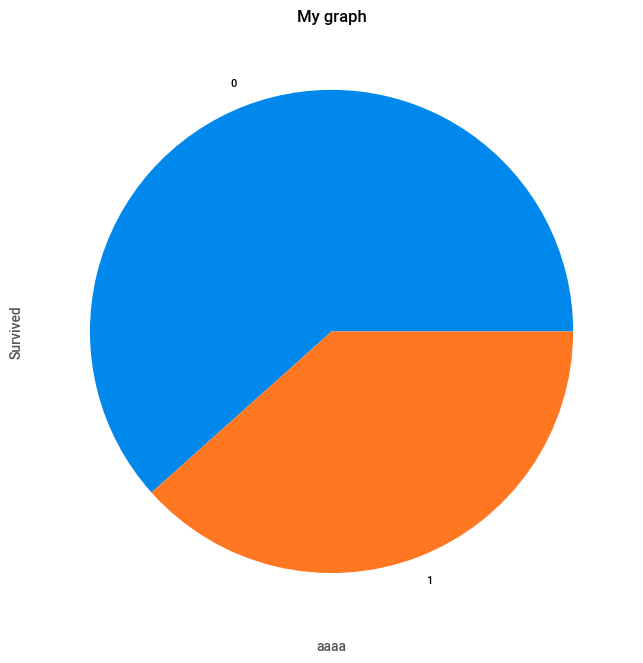

In [48]:
plt.figure(figsize = [10,8])
df['Survived'].value_counts().plot.pie()
plt.savefig("pie.jpg")
plt.title('My graph')
plt.xlabel('aaaa')
plt.show()

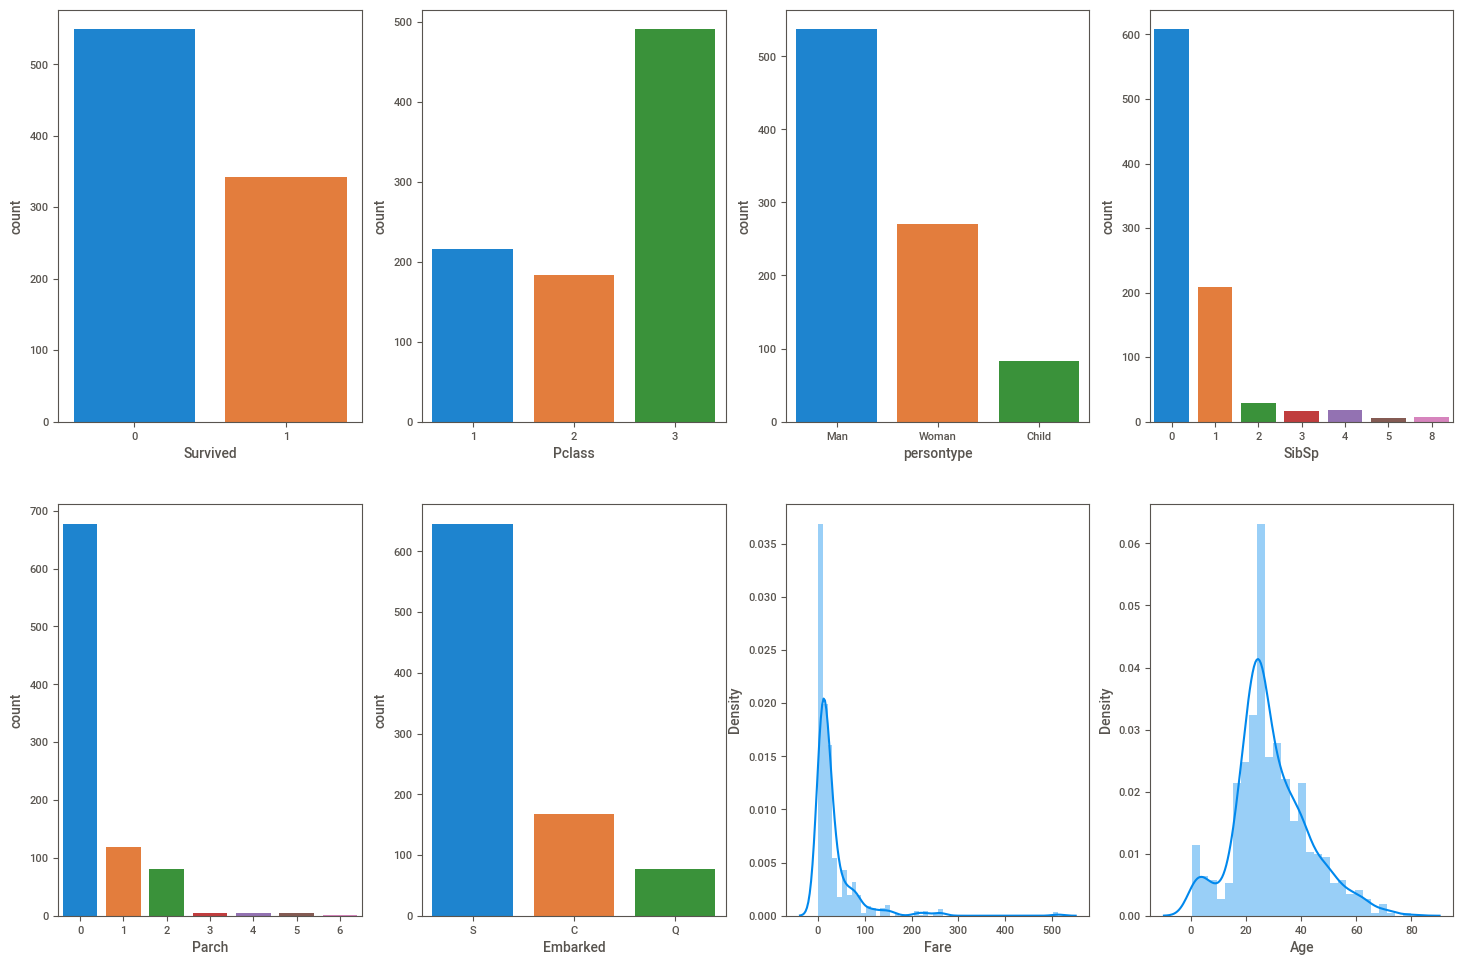

In [54]:
fig, axes = plt.subplots(2,4,figsize=(18,12))
sns.countplot(df['Survived'], ax = axes[0,0])
sns.countplot(df['Pclass'], ax = axes[0,1])
sns.countplot(df['persontype'], ax = axes[0,2])
sns.countplot(df['SibSp'], ax = axes[0,3])
sns.countplot(df['Parch'], ax = axes[1,0])
sns.countplot(df['Embarked'], ax = axes[1,1])
sns.distplot(df['Fare'], ax = axes[1,2])
sns.distplot(df['Age'], ax = axes[1,3])
plt.show()

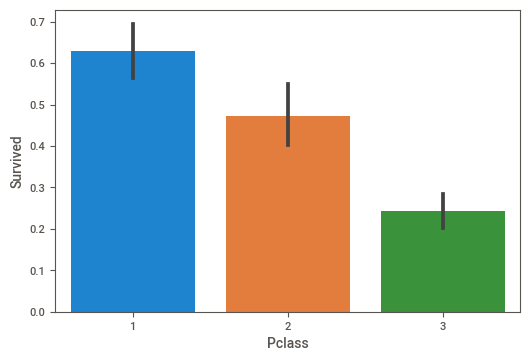

In [58]:
sns.barplot(x = df['Pclass'], y = df['Survived'])
plt.show()

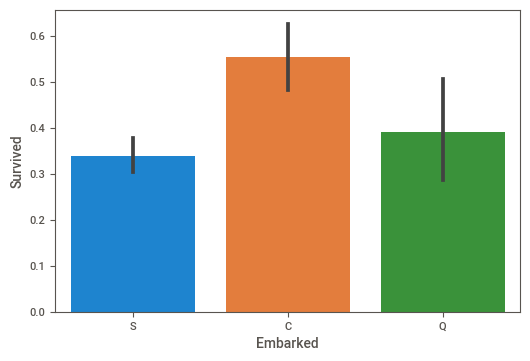

In [59]:
sns.barplot(x = df['Embarked'], y = df['Survived'])
plt.show()

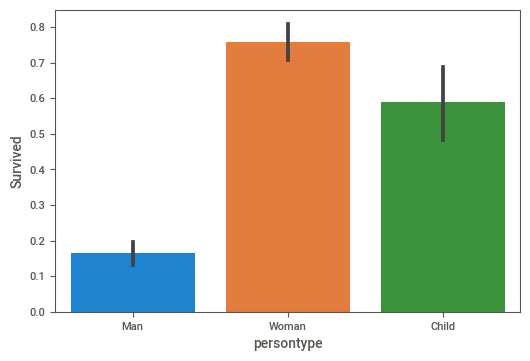

In [65]:
sns.barplot(x = df['persontype'], y = df['Survived'])
plt.show()

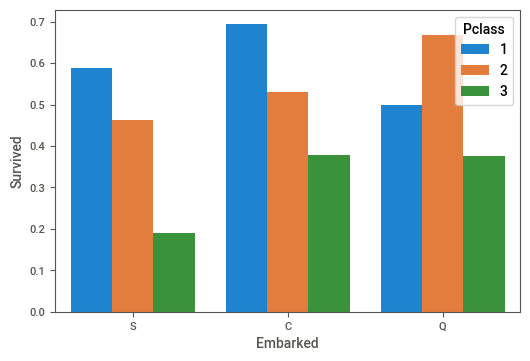

In [61]:
sns.barplot(x = df['Embarked'], y = df['Survived'], hue=df['Pclass'], ci=None)
plt.show()

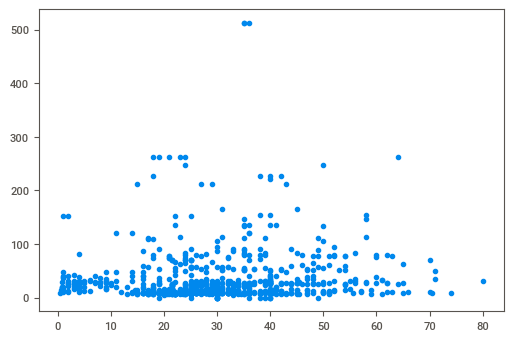

In [64]:
plt.scatter(df['Age'],df['Fare'])
plt.show()

In [66]:
corr = df.corr()
corr

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.059579,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.413583,0.083081,0.018443,-0.549500
Age,-0.059579,-0.413583,1.000000,-0.249854,-0.175526,0.122692
SibSp,-0.035322,0.083081,-0.249854,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.175526,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.122692,0.159651,0.216225,1.000000


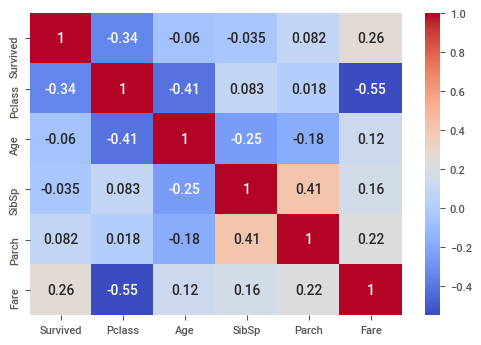

In [67]:
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()